In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error,r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
import sklearn.datasets

#    IMPORTING THE BOSTON HOUSE PRICE DATASET

In [41]:
house_price_dataset = sklearn.datasets.fetch_california_housing()

In [30]:
print(house_price_dataset)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [42]:
#loading the dataset to a pandas DataFrame
house_price_dataframe = pd.DataFrame(house_price_dataset.data, columns = house_price_dataset.feature_names)

In [43]:
#print First 5 rows of our DataFrame
house_price_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [44]:
#add the target (price) column to the DataFrame
house_price_dataframe['price'] = house_price_dataset.target

In [45]:
house_price_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [46]:
# checking the number of rows and columns in the dataframe
house_price_dataframe.shape

(20640, 9)

In [47]:
# check for missing values
house_price_dataframe.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
price         0
dtype: int64

In [48]:
# statistical measures of the dataset
house_price_dataframe.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [55]:
correlation = house_price_dataframe.corr()

<Axes: >

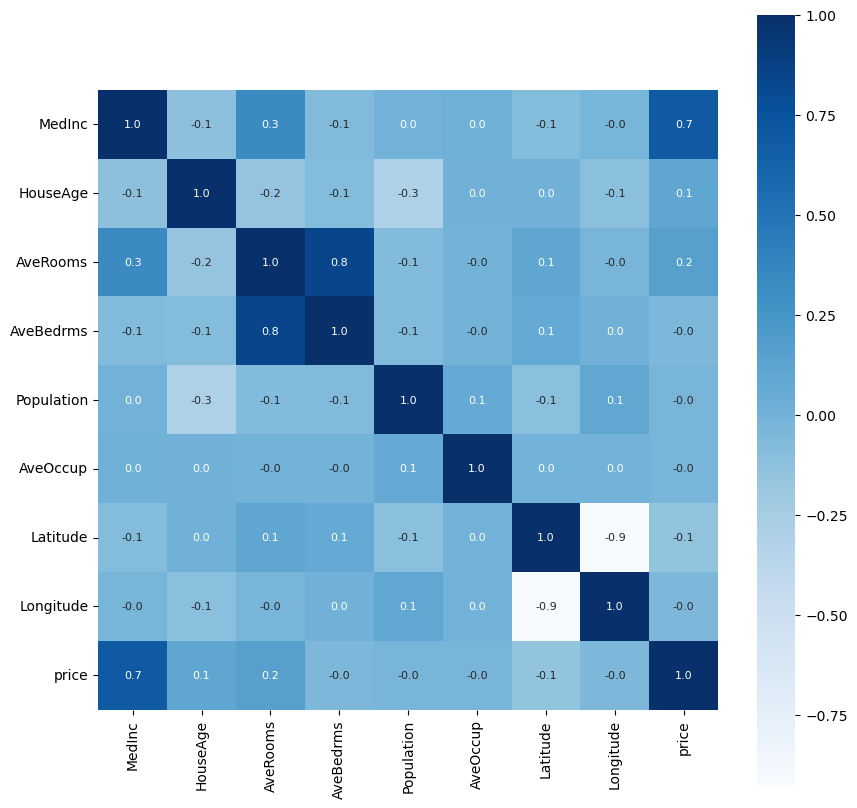

In [56]:
# constructing a heatmap to understand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

# splitting the data and Target

In [57]:
X = house_price_dataframe.drop(['price'], axis=1)
Y= house_price_dataframe['price']

In [58]:
print(X)
print(Y)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

# splitting the data into training data and test data

In [59]:
X_train,  X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [60]:
print(X.shape, X_train.shape, X_test.shape)

(20640, 8) (16512, 8) (4128, 8)


In [62]:
train_data=X_train.join(Y_train)

In [64]:
train_data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
2072,1.4817,6.0,4.443645,1.134293,1397.0,3.350120,36.77,-119.84,0.720
10600,6.9133,8.0,5.976471,1.026471,862.0,2.535294,33.68,-117.80,2.741
2494,1.5536,25.0,4.088785,1.000000,931.0,4.350467,36.60,-120.19,0.583
4284,1.5284,31.0,2.740088,1.008811,597.0,2.629956,34.10,-118.32,2.000
16541,4.0815,21.0,5.166667,1.002688,1130.0,3.037634,37.79,-121.23,1.179
...,...,...,...,...,...,...,...,...,...
1099,3.0625,20.0,5.860000,1.112000,745.0,2.980000,39.59,-121.90,0.938
18898,2.6133,49.0,5.163755,1.100437,1131.0,2.469432,38.11,-122.25,1.031
11798,4.4958,19.0,5.899767,1.074592,1206.0,2.811189,38.92,-121.22,1.926
6637,2.5750,39.0,3.591203,1.086675,2546.0,3.293661,34.16,-118.14,1.535


array([[<Axes: title={'center': 'MedInc'}>,
        <Axes: title={'center': 'HouseAge'}>,
        <Axes: title={'center': 'AveRooms'}>],
       [<Axes: title={'center': 'AveBedrms'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'AveOccup'}>],
       [<Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'price'}>]], dtype=object)

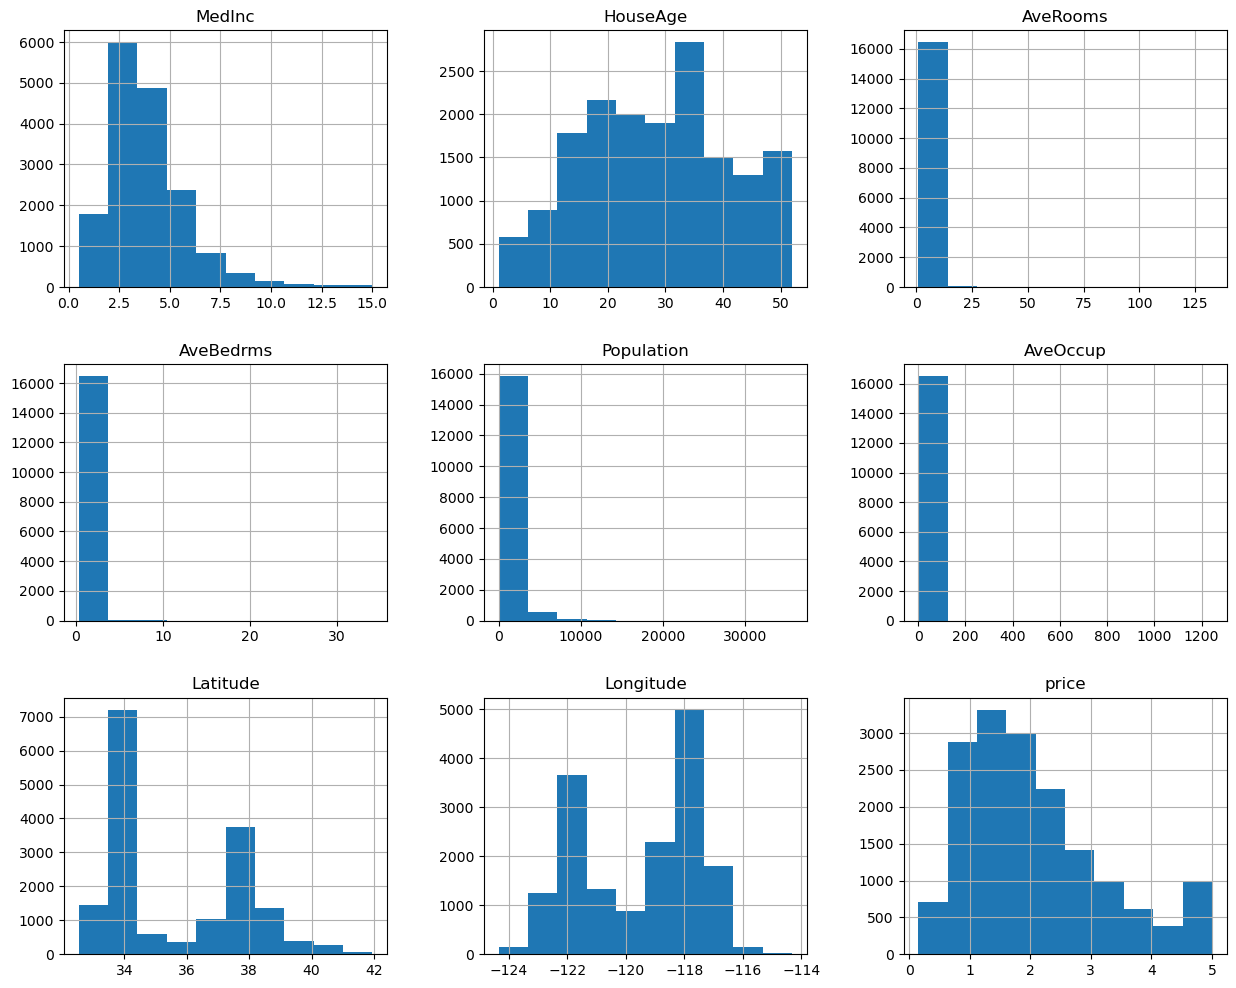

In [65]:
train_data.hist(figsize=(15,12))

In [66]:
train_data.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
MedInc,1.000000,-0.113804,0.358173,-0.062493,0.004353,0.022023,-0.076643,-0.019501,0.689659
HouseAge,-0.113804,1.000000,-0.161266,-0.080613,-0.295541,0.012206,0.010653,-0.109873,0.108626
AveRooms,0.358173,-0.161266,1.000000,0.823477,-0.071238,-0.010545,0.111456,-0.033410,0.157994
AveBedrms,-0.062493,-0.080613,0.823477,1.000000,-0.063942,-0.008050,0.069299,0.012471,-0.058170
Population,0.004353,-0.295541,-0.071238,-0.063942,1.000000,0.066149,-0.106416,0.099824,-0.027441
AveOccup,0.022023,0.012206,-0.010545,-0.008050,0.066149,1.000000,0.005914,0.001650,-0.027454
Latitude,-0.076643,0.010653,0.111456,0.069299,-0.106416,0.005914,1.000000,-0.924753,-0.143970
Longitude,-0.019501,-0.109873,-0.033410,0.012471,0.099824,0.001650,-0.924753,1.000000,-0.046754
price,0.689659,0.108626,0.157994,-0.058170,-0.027441,-0.027454,-0.143970,-0.046754,1.000000


<Axes: >

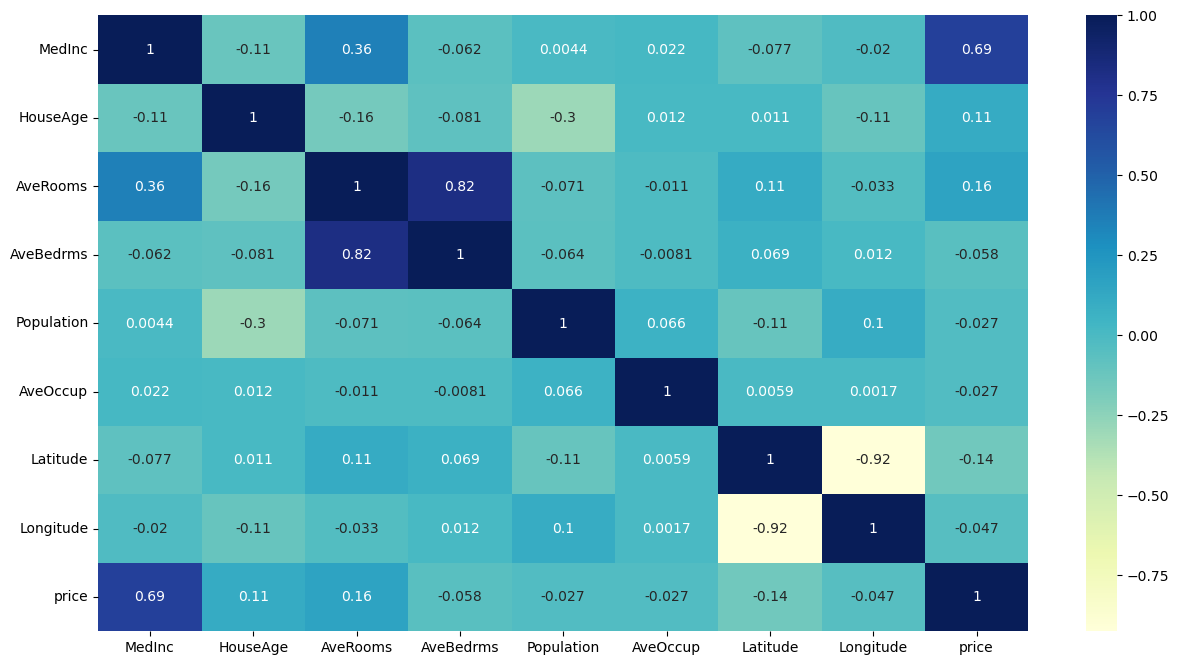

In [67]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [71]:
train_data['price']=np.log(train_data['price'] + 1)
train_data['AveRooms']=np.log(train_data['AveRooms'] + 1)
train_data['AveBedrms']=np.log(train_data['AveBedrms'] + 1)
train_data['MedInc']=np.log(train_data['MedInc'] + 1)

array([[<Axes: title={'center': 'MedInc'}>,
        <Axes: title={'center': 'HouseAge'}>,
        <Axes: title={'center': 'AveRooms'}>],
       [<Axes: title={'center': 'AveBedrms'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'AveOccup'}>],
       [<Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'price'}>]], dtype=object)

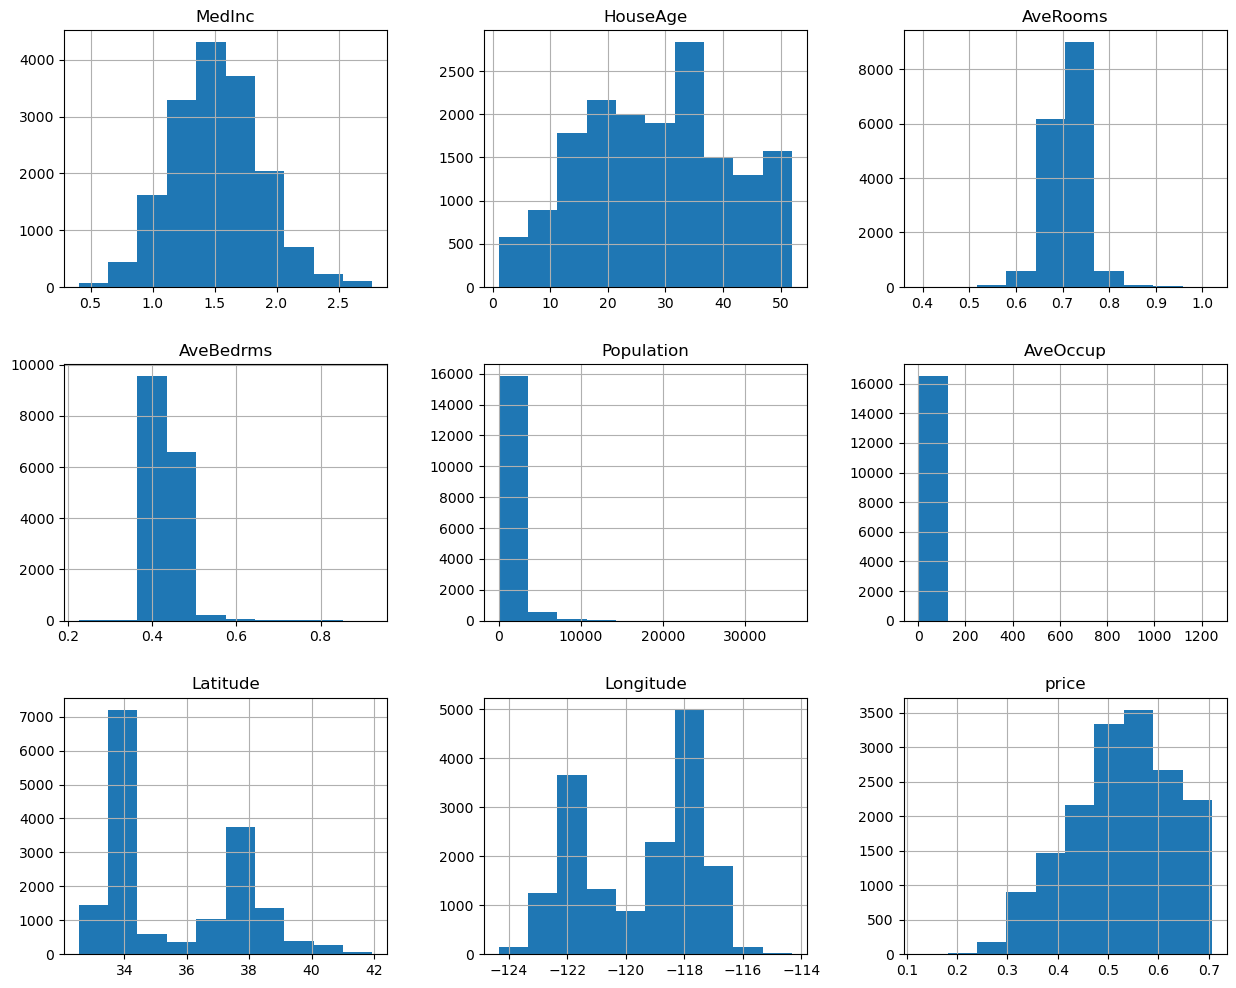

In [72]:
train_data.hist(figsize=(15,12))

# MODEL TRAINING
LINEAR REGRESSOR

In [78]:
# loading the model
model = LinearRegression()

In [79]:
model.fit(X_train, Y_train)

LinearRegression()

In [80]:
training_data_prediction = model.predict(X_train)

In [81]:
print(training_data_prediction)

[0.58807542 3.17425069 0.96796179 ... 1.53687806 1.78476947 1.21883569]


In [82]:
# R squared error
score_1 = metrics.r2_score(Y_train,training_data_prediction)

#mean Absoulte Error
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

print("R squared error :", score_1)
print('Mean Absoulte Error :', score_2)

R squared error : 0.6068205998456939
Mean Absoulte Error : 0.5303857028686884


In [93]:
model1=DecisionTreeRegressor()

In [94]:
model1.fit(X_train,Y_train)

DecisionTreeRegressor()

In [95]:
ypred=model1.predict(X_test)

In [96]:
r2_score(Y_test,ypred)

0.5913222592361276

In [97]:
model2=RandomForestRegressor()

In [98]:
model2.fit(X_train,Y_train)

RandomForestRegressor()

In [100]:
ypred1=model2.predict(X_test)

In [101]:
r2_score(Y_test,ypred1)

0.8033807532815496

In [103]:
model3=KNeighborsRegressor()

In [104]:
model3.fit(X_train,Y_train)

KNeighborsRegressor()

In [106]:
ypred2=model3.predict(X_test)

In [107]:
r2_score(Y_test,ypred2)

0.15221152883426214

# visualizing the actual prices and predicted prices

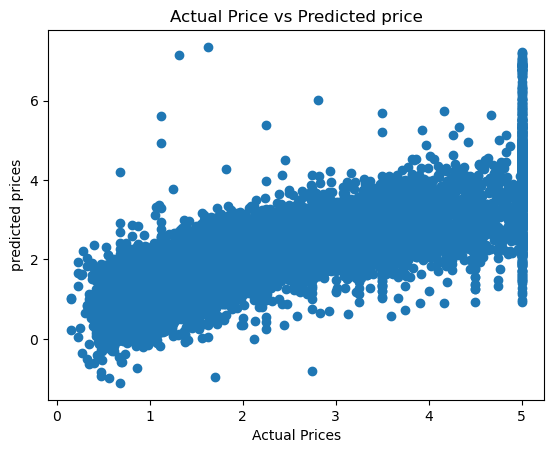

In [23]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("predicted prices")
plt.title("Actual Price vs Predicted price")
plt.show()


**Conclusion**: For this house price prediction dataset ,the algorithms used are Linear Regression,DecisionTree Regressor,Random Forest Regressor,KNeighbors Regressor. Among these algorithms RandomForest Regressor has given highest r2_score of 80%. So,RandomForest() algorithm should be used to fit house price prediction data for accurate predictions.